In [2]:
%matplotlib inline

In [3]:
import argparse
import glob
import os

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import datreant.core as dtr

In [4]:
b = dtr.discover('../../../solvers/solver_timing/Data/')

In [11]:
for t in b:
    if not "elapsed" in t.categories:
        print t.categories["library"], t.categories["solver"], t.abspath
        for f in glob.glob(os.path.join(t.abspath, "setup.sh.e*")):
            with open(f, 'r') as fp:
                for l in fp:
                    print l
        print "-"*75
#    !more {t.abspath}/setup.sh.e*

pysparse lu /Users/guyer/Documents/research/FiPy/fipy/solvers/solver_timing/Data/0c5af030-63aa-46d2-a808-744a24e8ae90/
Traceback (most recent call last):

  File "/users/guyer/FiPy/fipy/examples/benchmarking/solvers/diffusion.py", line 82, in <module>

    data.categories['sweep {0} - iterations'.format(sweep)] = solver.status['iterations']

KeyError: 'iterations'

---------------------------------------------------------------------------
trilinos lu /Users/guyer/Documents/research/FiPy/fipy/solvers/solver_timing/Data/1a993575-d3e0-4948-ad61-f119d2405510/
Traceback (most recent call last):

  File "/users/guyer/FiPy/fipy/examples/benchmarking/solvers/diffusion.py", line 82, in <module>

    data.categories['sweep {0} - iterations'.format(sweep)] = solver.status['iterations']

KeyError: 'iterations'

---------------------------------------------------------------------------
pysparse lu /Users/guyer/Documents/research/FiPy/fipy/solvers/solver_timing/Data/234086f3-7aa3-4db7-8d59-3ce2d5b

In [14]:
!more /Users/guyer/Documents/research/FiPy/fipy/solvers/solver_timing/Data/0c5af030-63aa-46d2-a808-744a24e8ae90/Treant.333791eb-be75-4cc4-b3b5-f2f1f30a7904.json

{"categories": {"processes": 1, "solver": "lu", "script": "/users/guyer/FiPy/fip y/examples/benchmarking/solvers/diffusion.py", "sweeps": 10, "library": "pyspars e", "iterations": 1000, "tolerance": 1e-10, "numberOfElements": 1000}, "tags": [ ]}
>

In [132]:
df = pd.DataFrame(b.categories.any)

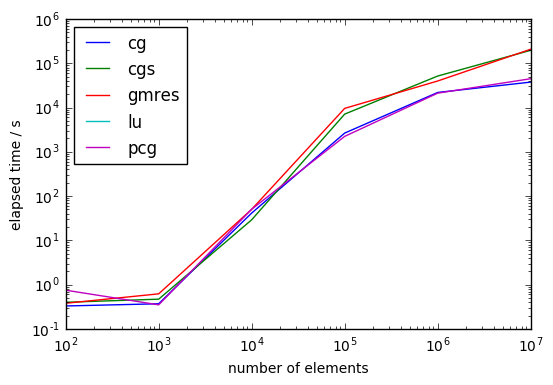

In [133]:
for name, results in df[df["library"] == "pysparse"].groupby("solver"): 
    results = results.sort_values(by="numberOfElements")
    plt.loglog(results["numberOfElements"], results["elapsed"], label=name)
plt.legend(loc="upper left")
plt.xlabel("number of elements")
plt.ylabel("elapsed time / s")

In [147]:
df[:5]

,elapsed,iterations,library,numberOfElements,processes,script,solver,sweep 0 - iterations,sweep 1 - iterations,sweep 2 - iterations,sweep 3 - iterations,sweep 4 - iterations,sweep 5 - iterations,sweep 6 - iterations,sweep 7 - iterations,sweep 8 - iterations,sweep 9 - iterations,sweeps,tolerance
0,4996.49,1000,trilinos,100000,1,/users/guyer/FiPy/fipy/examples/benchmarking/s...,cgs,747.0,1000.0,891.0,1000.0,897.0,1000.0,1000.0,1000.0,1000.0,1000.0,10,1.000000e-10
1,18406.32,1000,trilinos,1000000,1,/users/guyer/FiPy/fipy/examples/benchmarking/s...,cg,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,10,1.000000e-10
2,NaN,1000,pysparse,1000,1,/users/guyer/FiPy/fipy/examples/benchmarking/s...,lu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1.000000e-10
3,50.21,1000,pysparse,10000,1,/users/guyer/FiPy/fipy/examples/benchmarking/s...,gmres,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,10,1.000000e-10
4,0.38,1000,pysparse,100,1,/users/guyer/FiPy/fipy/examples/benchmarking/s...,gmres,55.0,59.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,10,1.000000e-10


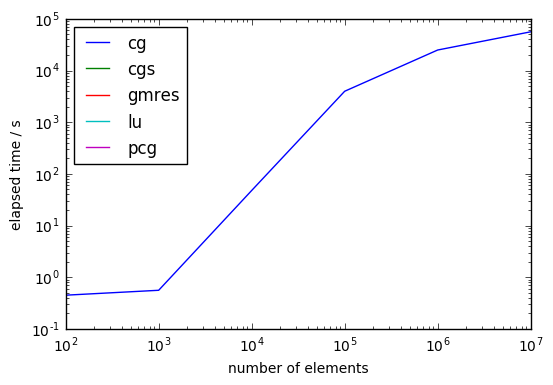

In [137]:
for name, results in df[df["library"] == "scipy"].groupby("solver"): 
    results = results.sort_values(by="numberOfElements")
    plt.loglog(results["numberOfElements"], results["elapsed"], label=name)
plt.legend(loc="upper left")
plt.xlabel("number of elements")
plt.ylabel("elapsed time / s")

In [146]:
df[(df["library"] == "trilinos") & (df["solver"] == "cgs")]

,elapsed,iterations,library,numberOfElements,processes,script,solver,sweep 0 - iterations,sweep 1 - iterations,sweep 2 - iterations,sweep 3 - iterations,sweep 4 - iterations,sweep 5 - iterations,sweep 6 - iterations,sweep 7 - iterations,sweep 8 - iterations,sweep 9 - iterations,sweeps,tolerance
0,4996.49,1000,trilinos,100000,1,/users/guyer/FiPy/fipy/examples/benchmarking/s...,cgs,747.0,1000.0,891.0,1000.0,897.0,1000.0,1000.0,1000.0,1000.0,1000.0,10,1.000000e-10
15,27903.67,1000,trilinos,10000000,1,/users/guyer/FiPy/fipy/examples/benchmarking/s...,cgs,1000.0,1000.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,10,1.000000e-10
22,29.58,1000,trilinos,10000,1,/users/guyer/FiPy/fipy/examples/benchmarking/s...,cgs,258.0,494.0,320.0,427.0,369.0,386.0,464.0,472.0,507.0,422.0,10,1.000000e-10
26,14902.93,1000,trilinos,1000000,1,/users/guyer/FiPy/fipy/examples/benchmarking/s...,cgs,1000.0,1000.0,1000.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,10,1.000000e-10
46,0.38,1000,trilinos,100,1,/users/guyer/FiPy/fipy/examples/benchmarking/s...,cgs,25.0,33.0,36.0,37.0,41.0,37.0,38.0,41.0,37.0,39.0,10,1.000000e-10


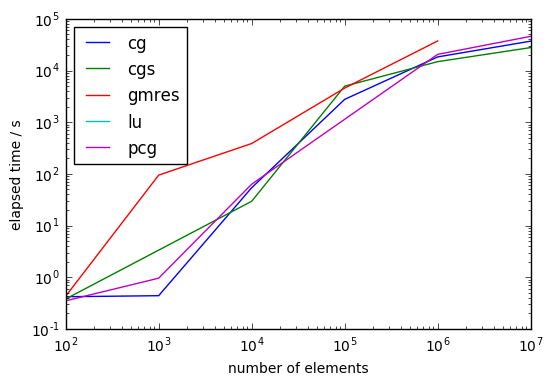

In [138]:
for name, results in df[df["library"] == "trilinos"].groupby("solver"): 
    results = results.sort_values(by="numberOfElements")
    plt.loglog(results["numberOfElements"], results["elapsed"], label=name)
plt.legend(loc="upper left")
plt.xlabel("number of elements")
plt.ylabel("elapsed time / s")

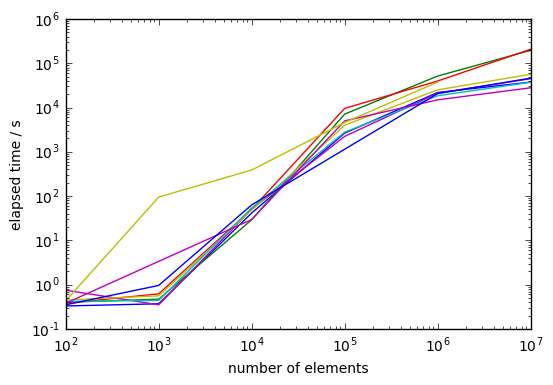

In [139]:
for name, results in df.groupby(("library", "solver")): 
    results = results.sort_values(by="numberOfElements")
    plt.loglog(results["numberOfElements"], results["elapsed"], label=' - '.join(name))
# plt.legend(loc="upper left")
plt.xlabel("number of elements")
plt.ylabel("elapsed time / s")

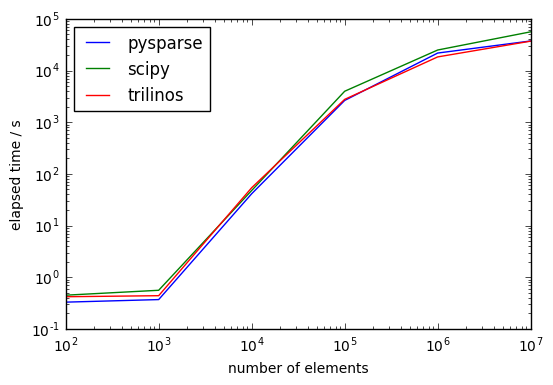

In [140]:
for name, results in df[df["solver"] == "cg"].groupby("library"): 
    results = results.sort_values(by="numberOfElements")
    plt.loglog(results["numberOfElements"], results["elapsed"], label=name)
plt.legend(loc="upper left")
plt.xlabel("number of elements")
plt.ylabel("elapsed time / s")

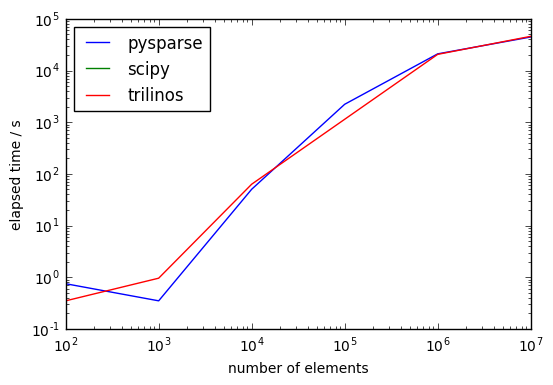

In [141]:
for name, results in df[df["solver"] == "pcg"].groupby("library"): 
    results = results.sort_values(by="numberOfElements")
    plt.loglog(results["numberOfElements"], results["elapsed"], label=name)
plt.legend(loc="upper left")
plt.xlabel("number of elements")
plt.ylabel("elapsed time / s")

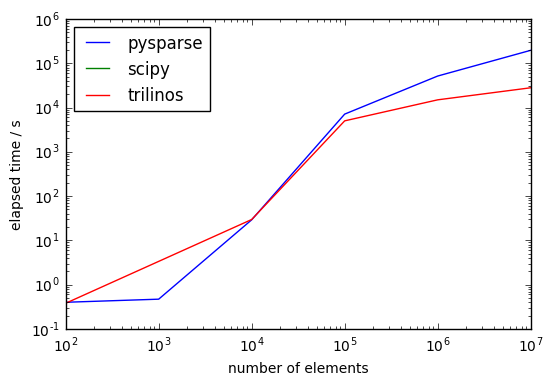

In [142]:
for name, results in df[df["solver"] == "cgs"].groupby("library"): 
    results = results.sort_values(by="numberOfElements")
    plt.loglog(results["numberOfElements"], results["elapsed"], label=name)
plt.legend(loc="upper left")
plt.xlabel("number of elements")
plt.ylabel("elapsed time / s")

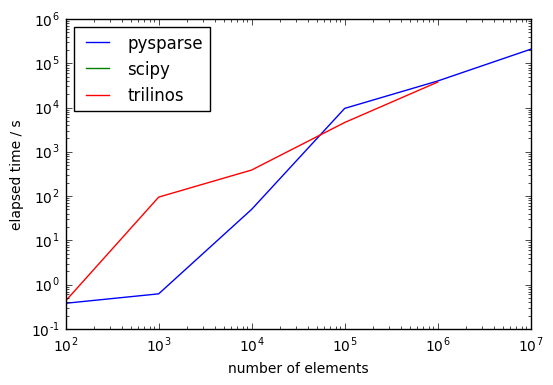

In [143]:
for name, results in df[df["solver"] == "gmres"].groupby("library"): 
    results = results.sort_values(by="numberOfElements")
    plt.loglog(results["numberOfElements"], results["elapsed"], label=name)
plt.legend(loc="upper left")
plt.xlabel("number of elements")
plt.ylabel("elapsed time / s")

ValueError: Data has no positive values, and therefore can not be log-scaled.

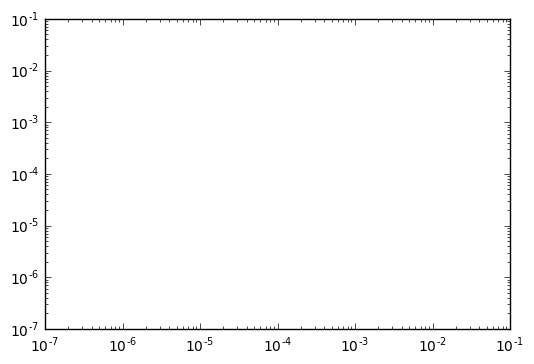

In [144]:
for name, results in df[df["solver"] == "lu"].groupby("library"): 
    results = results.sort_values(by="numberOfElements")
    plt.loglog(results["numberOfElements"], results["elapsed"], label=name)
plt.legend(loc="upper left")
plt.xlabel("number of elements")
plt.ylabel("elapsed time / s")

In [121]:
b = dtr.discover('../../../solvers/solver_timing/memory/Data/')

In [122]:
df = pd.DataFrame(b.categories.all)

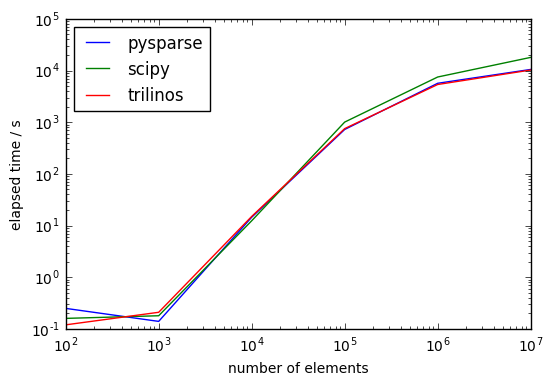

In [123]:
for name, library in df.groupby("library"): 
    library = library.sort_values(by="numberOfElements")
    plt.loglog(library["numberOfElements"], library["elapsed"], label=name)
plt.legend(loc="upper left")
plt.xlabel("number of elements")
plt.ylabel("elapsed time / s")

In [124]:
mprof = !which mprof
execfile(mprof[-1])

Usage: __main__.py <command> <options> <arguments>

Available commands:

    run      run a given command or python file
    rm       remove a given file generated by mprof
    clean    clean the current directory from files created by mprof
    list     display existing profiles, with indices
    plot     plot memory consumption generated by mprof run

Type mprof <command> --help for usage help on a specific command.
For example, mprof plot --help will list all plotting options.



SystemExit: 1

In [ ]:
def parse_args(mprofile):
    parser = argparse.ArgumentParser()
    parser.add_argument("--output", help="directory to store results in")
    parser.add_argument("--numberOfElements", help="number of total cells in a Grid2D",
                        type=int, default=10000)
    parser.add_argument("--solver", help="solver class to use",
                        choices=("cg", "pcg", "cgs", "gmres", "lu"), default="cg")
    parser.add_argument("--sweeps", help="number of nonlinear sweeps to take",
                        type=int, default=10)
    parser.add_argument("--iterations", help="maximum number of linear iterations to take for each sweep",
                        type=int, default=1000)
    parser.add_argument("--tolerance", help="linear solver tolerance",
                        type=float, default=1e-10)
    parser.add_argument("--writeFiles", help="whether to write solution values and matrix to OUTPUT",
                        action='store_true')
    
    parser.add_argument("--pysparse", help="use PySparse solvers", dest="library",
                        action="store_const", const="pysparse")
    parser.add_argument("--trilinos", help="use PyTrilinos solvers", dest="library",
                        action="store_const", const="trilinos")
    parser.add_argument("--scipy", help="use SciPy solvers", dest="library",
                        action="store_const", const="scipy")
    parser.set_defaults(library="pysparse")

    return parser.parse_known_args(mprofile['cmd_line'].split())

In [ ]:
highwater = []

for f in glob.glob('../../../solvers/solver_timing/memory/mprofile_*.dat'):
    mprofile = read_mprofile_file(f)
    
    args, unknowns = parse_args(mprofile)
    args.__dict__['mem_usage'] = max(mprofile['mem_usage'])
    highwater.append(args.__dict__)

In [ ]:
highwater = pd.DataFrame(highwater)

In [84]:
df = pd.merge(df, highwater, on=("library", "solver", "iterations", "sweeps", "tolerance", "numberOfElements"))

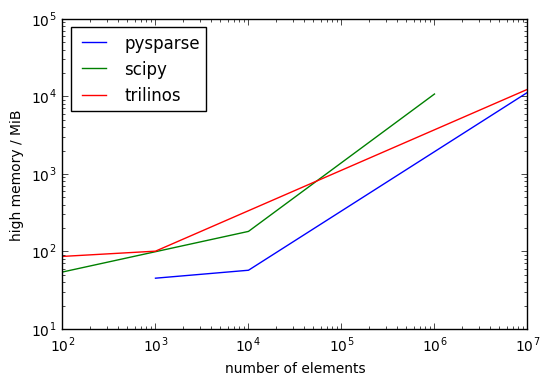

In [85]:
for name, library in df.groupby("library"): 
    library = library.sort_values(by="numberOfElements")
    plt.loglog(library["numberOfElements"], library["mem_usage"], label=name)
plt.legend(loc="upper left")
plt.xlabel("number of elements")
plt.ylabel("high memory / MiB")